# Overfitting Model
The model is too complex and adapts perfectly on the training images but performs poorly on the test data.

The learning curve of the overfitting model will show that the accuracy on the training set is high and improving over time, while the accuracy on the validation set is lower and plateauing or even decreasing over time.

In [7]:
import numpy as np
import matplotlib.pyplot as plt

Found 2666 images belonging to 5 classes.
Found 2499 images belonging to 5 classes.


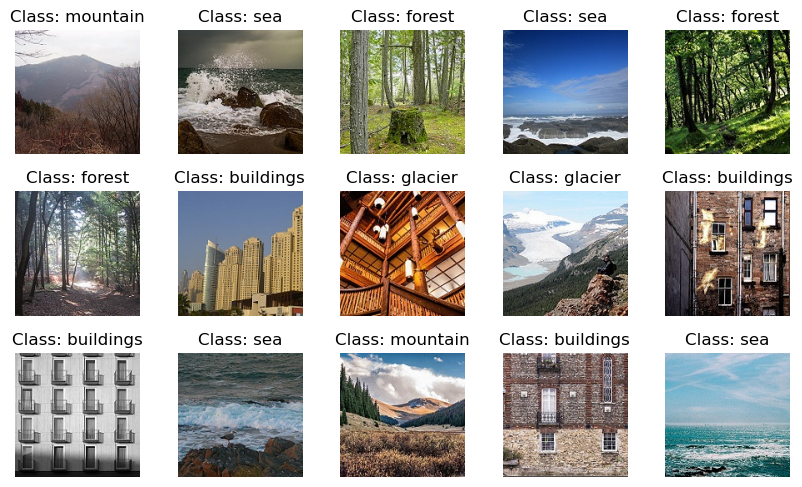

In [8]:
%run rueegg_wissiak_data_augmentation.ipynb

## Building the Model
The SparseCategoricalCrossentropy calculates the loss of a categorical model with labels provided as integer values. 

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()

model.add(Conv2D(32, (3,3), input_shape= (img_size,img_size,3), activation = 'relu', padding = 'same')) #padding = same size output
model.add(MaxPooling2D())

model.add(Conv2D(64, (3,3), activation = 'relu', padding = 'same'))
model.add(MaxPooling2D())

model.add(Conv2D(128, (3,3), activation = 'relu', padding = 'same')) 
model.add(MaxPooling2D())

model.add(Conv2D(256, (3,3), activation = 'relu', padding = 'same')) 
model.add(MaxPooling2D())

model.add(Conv2D(512, (3,3), activation = 'relu', padding = 'same')) 
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(5, activation = 'softmax'))

model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [10]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 37, 37, 128)       73856     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 18, 18, 128)     

## Training the Model
Learnings: In each epoch all images are sent into the CNN and through backpropagation the weights get adapted. The output of the `model.fit()` process outputs e.g.
```
Epoch 1/20
35/163 [==============================]
```
which indicates that the CNN is currently training the 35th batch of 162 batches of the first epoch. If we use a batch_size of 32 we can then calculate the number of images included in the training step -> 163*32=5216.
The number of epochs defines how many times the CNN sees the **entire** dataset but in a different order.

Another outcome that we've encountered is that the `model.fit()` process needs at least 20 epochs to converge sufficiently so that the overfitting phenomenon is visible in the Loss and Accuracy graph.

In [11]:
history = model.fit(
    train_generator, 
    validation_data=test_generator,
    epochs=20,
)

Epoch 1/20


2023-03-13 15:25:49.697766: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-03-13 15:25:49.876431: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


84/84 [==============================] - ETA: 0s - loss: 1.1653 - accuracy: 0.5075

2023-03-13 15:25:54.418813: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


84/84 [==============================] - 6s 69ms/step - loss: 1.1653 - accuracy: 0.5075 - val_loss: 1.0028 - val_accuracy: 0.5886
Epoch 2/20
84/84 [==============================] - 5s 56ms/step - loss: 0.9276 - accuracy: 0.6148 - val_loss: 1.0796 - val_accuracy: 0.5558
Epoch 3/20
84/84 [==============================] - 5s 55ms/step - loss: 0.8557 - accuracy: 0.6519 - val_loss: 0.8354 - val_accuracy: 0.6623
Epoch 4/20
84/84 [==============================] - 5s 55ms/step - loss: 0.7500 - accuracy: 0.7048 - val_loss: 0.7956 - val_accuracy: 0.6903
Epoch 5/20
84/84 [==============================] - 5s 55ms/step - loss: 0.6513 - accuracy: 0.7543 - val_loss: 0.6501 - val_accuracy: 0.7591
Epoch 6/20
84/84 [==============================] - 5s 55ms/step - loss: 0.5904 - accuracy: 0.7862 - val_loss: 0.7357 - val_accuracy: 0.6999
Epoch 7/20
84/84 [==============================] - 5s 55ms/step - loss: 0.5060 - accuracy: 0.8166 - val_loss: 0.6738 - val_accuracy: 0.7387
Epoch 8/20
84/84 [======

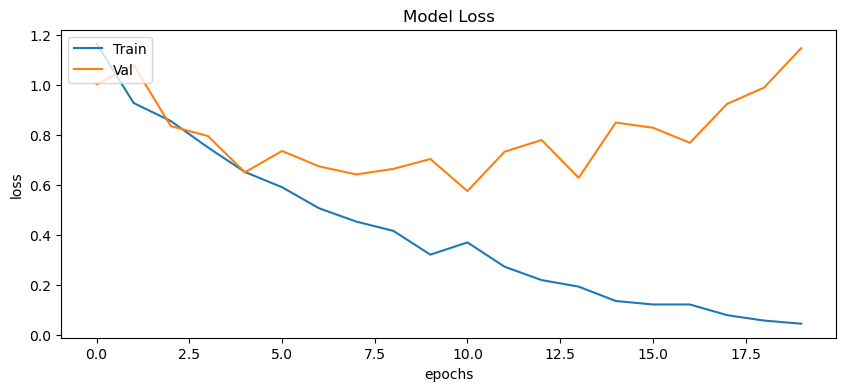

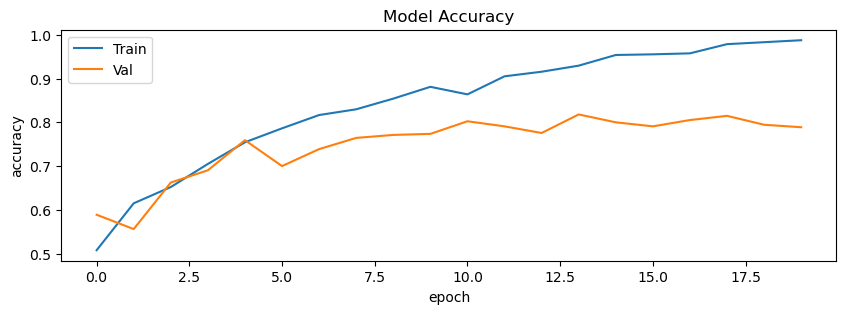

In [12]:
%run rueegg_wissiak_model_visualization.ipynb